# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [28]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')


In [29]:
df.tail(60)

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
11994,NaN,"Nov 03, 2011",2011/11/03,60.90
11995,NaN,"Nov 04, 2011",2011/11/04,66.94
11996,NaN,"Nov 05, 2011",2011/11/05,74.20
11997,NaN,"Nov 06, 2011",2011/11/06,79.64
11998,NaN,"Nov 07, 2011",2011/11/07,81.47
11999,NaN,"Nov 08, 2011",2011/11/08,73.64
12000,NaN,"Nov 09, 2011",2011/11/09,62.27
12001,NaN,"Nov 10, 2011",2011/11/10,62.84
12002,NaN,"Nov 11, 2011",2011/11/11,68.84
12003,NaN,"Nov 12, 2011",2011/11/12,76.05


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [30]:
df.drop(df.index[df['Notes'] == 'Total'], inplace = False).drop(columns=['Notes'])

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,29.03
1,"Jan 02, 1979",1979/01/02,31.35
2,"Jan 03, 1979",1979/01/03,41.66
3,"Jan 04, 1979",1979/01/04,47.30
4,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67
12049,"Dec 28, 2011",2011/12/28,59.91
12050,"Dec 29, 2011",2011/12/29,66.64
12051,"Dec 30, 2011",2011/12/30,68.61


>3) Make a column called Date that is in the pandas datetime format

In [31]:
df['Date']= pd.to_datetime(df['Month Day, Year'])

>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [32]:
df['Year']= df['Date'].dt.year
df['Month']= df['Date'].dt.month
df['Day']= df['Date'].dt.day

In [33]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

In [34]:
#plot = df.plot(kind= "scatter")
#plot.scatter(df['Date'],df['Avg Daily Max Air Temperature (F)']).figsize=(50,5) 
#ax.set_xlabel('Income', fontsize=16)
#ax.set_ylabel('Food expenditure', fontsize=16);

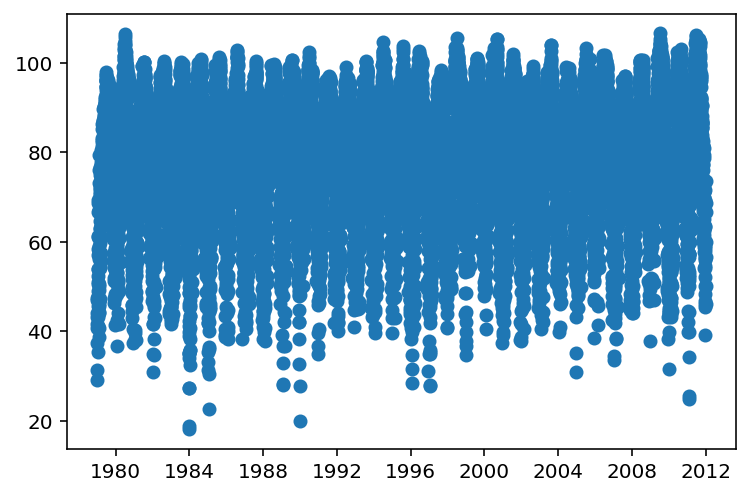

In [40]:
aa = plt.scatter(df['Date'], df['Avg Daily Max Air Temperature (F)'])
aa.figsize=(50,5) 


>5) Describe your plot.

In [36]:
# all of the tempetures for each year are ploted all the graph
#the x axis is the year range and the y axis is the variuose tempatures

### Adding colors for our graph

In [37]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

In [45]:
aa = plt.scatter(df['Date'], df['Avg Daily Max Air Temperature (F)'],c=df['color']);

KeyError: 'color'

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [46]:
df.loc['Date']


KeyError: 'Date'

>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [ ]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [ ]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [ ]:
Y_pred = lin_reg(X,Y)

In [ ]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

>12) Is the slope positive or negative? What do you think that means?